#  Simple Linear Regression

In this project, we will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, we will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, and interpreting model coefficients. We will use the case study given below to carry out this project.

#### Case Study: ####
For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

*This project has 4 parts:*

**Part 1:** Imports and Data loading

**Part 2:** Data Exploration and  Cleaning


**Part 3:** Model Building

**Part 4:** Results and Evaluation


<br/>

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, we will need to use `pandas`, `pyplot`, and `seaborn`.

In [119]:
# Import pandas, pyplot, and seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`.

In [120]:
# Import the statsmodel module and ols function.
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load the dataset

In [121]:
# load data
data = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\SLR\market_and_sales.csv')

## Step 2: Data exploration and Cleaning

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [59]:
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [60]:
data.shape

(4572, 4)

Generate summary statistics using the `describe()` method.

In [61]:
data.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


And summary information using the `info()` method.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


Check for number of duplicates using the `duplicated()` method

In [64]:
data.duplicated().sum()

0

Check for missing values using the `isna()` method

In [65]:
data.isna().sum()

TV              10
Radio            4
Social_Media     6
Sales            6
dtype: int64

All our variables contain missing values, totalling 26.
Given the small ratio of our missing values to our total data, we can remove them

Drop the missing rows using the `dropna()` method

In [117]:
# drop missing values
data = data.dropna(axis = 0)

# confirm it worked
data.isna().sum()

TV              0
Radio           0
Social_Media    0
Sales           0
dtype: int64

Check for outliers using box plots

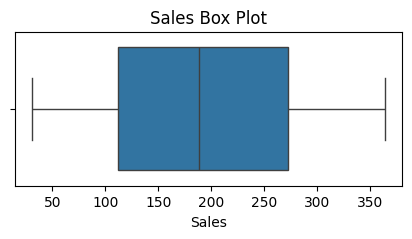

In [118]:
# plot boxplot
plt.figure(figsize = (5,2))
sns.boxplot(x = data['Sales'], fliersize = 1)
plt.title('Sales Box Plot')
plt.show()

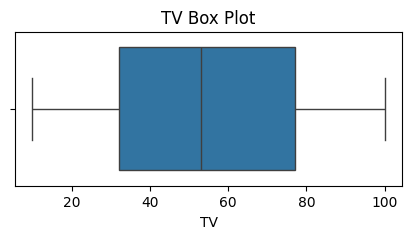

In [68]:
# plot boxplot
plt.figure(figsize = (5,2))
sns.boxplot(x = data[''], fliersize = 1)
plt.title('TV Box Plot')
plt.show()

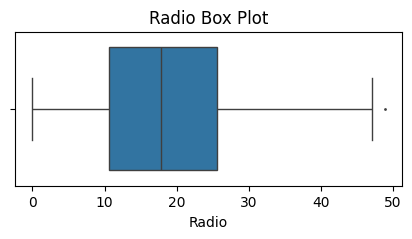

In [69]:
# plot boxplot
plt.figure(figsize = (5,2))
sns.boxplot(x = data['Radio'], fliersize = 1)
plt.title('Radio Box Plot')
plt.show()

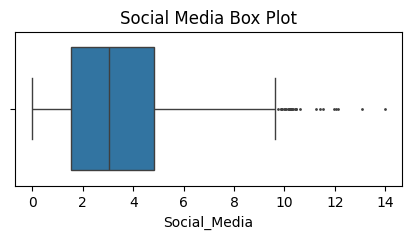

In [122]:
# plot boxplot
plt.figure(figsize = (5,2))
sns.boxplot(x = data['Social_Media'], fliersize = 1)
plt.title('Social Media Box Plot')
plt.show()

Our box plots indicate a number of outliers in `Social_Media` column, with the rest of our columns well balanced. 
We will only further probe and handle the outliers in `Social_Media` if we eventually pick it as our predictor variable. This can be done by determing which of our independent variables has the strongest linear relationship with `Sales` .

### Visualize the distribution of the outcome variable (Sales) 

Create a histogram to visualize the distribution of `Sales`.

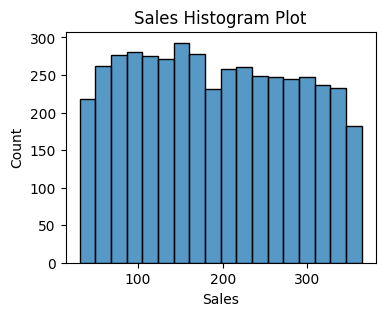

In [86]:
# Create a histogram of the Sales.
plt.figure(figsize = (4, 3))
sns.histplot(data['Sales'])
plt.title('Sales Histogram Plot')
plt.show()

The sales histogram shows a roughly even distribution

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. we will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help us select the predictor variable for the simple linear regression.

<Figure size 800x800 with 0 Axes>

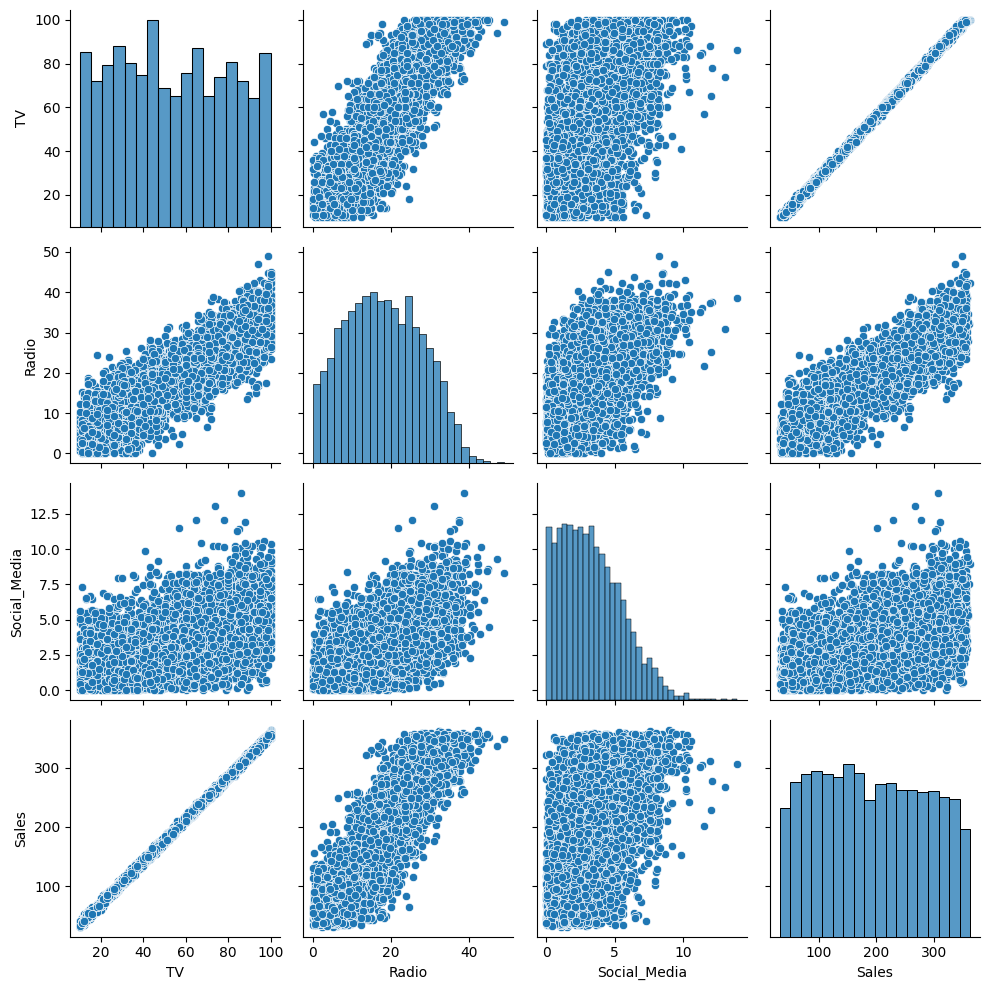

In [79]:
# Create a pairplot of the data.
plt.figure(figsize = (8, 8))
sns.pairplot(data)
plt.tight_layout()
plt.show()

From our ScatterPlot it is clear that `TV` has the strongest linear relationship with `Sales`. Both `Radio` and `Social_Media` also have a correlation with Sales but with a larger variance. The plot between `Sales` and `TV` can also be estimated with a straight line.

We will select `TV` as the predictor variable for our Simple Linear Regression

### Build and fit the model

In [123]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Display the model results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:06:42   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, we must check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable with the dependent variable.

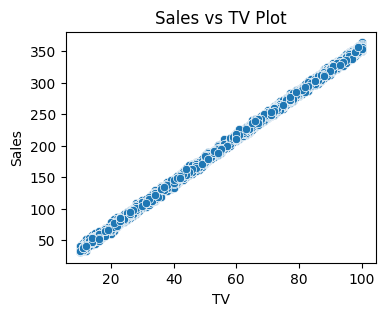

In [124]:
# Create a scatterplot comparing X and Sales (Y).
plt.figure(figsize = (4,3))
sns.scatterplot(x = data['TV'], y = data['Sales'])
plt.title('Sales vs TV Plot')
plt.show()

The plot shows a clear and strong relationship between Sales and TV

The Linearity assumption is met

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

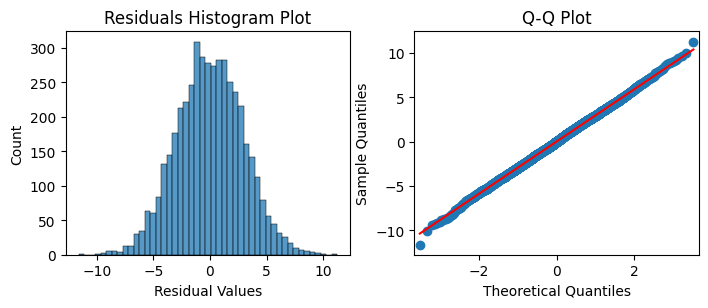

In [126]:
# Calculate the residuals. 
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(1,2, figsize = (7,3))

# Create a histogram with the residuals.
sns.histplot(residuals, ax = axes[0])
axes[0].set_title('Residuals Histogram Plot')
axes[0].set_xlabel('Residual Values')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title('Q-Q Plot')
plt.tight_layout(pad = 0.4)
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

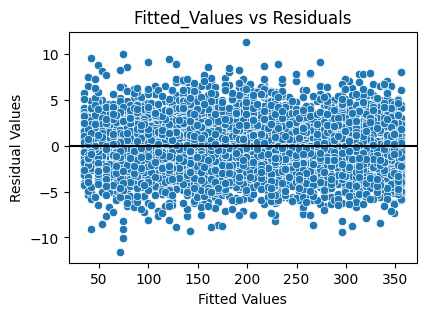

In [110]:
# Create a scatterplot with the fitted values from the model and the residuals.
fitted_values = model.predict(data['TV'])

plt.figure(figsize = (4.5, 3))
sns.scatterplot(x = fitted_values, y = residuals)
plt.title('Fitted_Values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.axhline(0, color = 'black')
plt.show()

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

### Display the OLS regression results

As the linearity assumptions have been met, we can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [127]:
# Display the model_results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:13:02   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?**


Using `TV` as X variable, results from our simple linear regression model show $R^{2} = 0.999$. 

This means `TV` explains $99.9\%$ of the variation in `Sales`.

The R-squared value will depend on the variable selected for X. 

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question: Based on the preceding model results, what do you observe about the coefficients?**

When `TV` is used as the independent variable X, the coefficient for the `Intercept` is -0.1263 and the `coefficient` for `TV` is 3.5614. 

**Question: How would you write the relationship between X and `Sales` in the form of a linear equation?**

When `TV` is used as the independent variable X, the linear equation is:

Y = Intercept + Slope * X

Sales = Intercept + Slope *TV (in millions)

Sales = -0.1263 + 3.5614 * TV (in millions)

**Question:** Based on this model, what is your interpretation of the relationship between X and `Sales`?


Based on our model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

Based on model, when `TV` is used as the independent variable, it has a p-value of $0.000$ and a $95\%$ confidence interval of $[3.558,3.565]$.

This means there is a $95\%$ chance the interval $[3.558,3.565]$ contains the true parameter value of the slope. 

These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `TV` has on `Sales`.